<a href="https://colab.research.google.com/github/Bigyajeet/CTTC_AIML_INTERN_HUB/blob/main/vgg19imple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD


In [ ]:
#load the cifar10 datasets
(xtr,ytr),(xts,yts)=cifar10.load_data()

In [ ]:
#normalize the given  pixels value
xtr=xtr.astype('float32')/255.0
xts=xts.astype('float32')/255.0

In [ ]:
num_classes=10
ytr=keras.utils.to_categorical(ytr,num_classes)
yts=keras.utils.to_categorical(yts,num_classes)

In [ ]:
#preload the VGG16 model (excluding the top layers)
base_model=VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(32,32,3))

In [ ]:
#addcustom top layers to the vgg16 model
x=Flatten()(base_model.output)
x=Dense(4096,activation='relu')(x)
x=Dense(4096,activation='relu')(x)
x=Dense(10,activation='softmax')(x)

In [ ]:
#create the new model by combining the base VGG16 model and the
model=Model(inputs=base_model.input,outputs=x)

In [ ]:
#freeze the weights of the pre-trained layers
for layer in base_model.layers:
  layer.trainable=False


#print  the model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │     2,101,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,638,218 (128.32 MB)

 Trainable params: 18,923,530 (72.19 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
#compile
model.compile(optimizer=SGD(learning_rate=0.001,momentum=0.9),loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#train the model
model.fit(xtr,ytr,batch_size=128,epochs=10,validation_split=0.1)

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.2964 - loss: 2.0863 - val_accuracy: 0.4694 - val_loss: 1.6419
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.4519 - loss: 1.6164 - val_accuracy: 0.5042 - val_loss: 1.4772
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.4939 - loss: 1.4789 - val_accuracy: 0.5196 - val_loss: 1.3969
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.5153 - loss: 1.4097 - val_accuracy: 0.5360 - val_loss: 1.3503
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.5296 - loss: 1.3634 - val_accuracy: 0.5430 - val_loss: 1.3243
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.5381 - loss: 1.3308 - val_accuracy: 0.5522 - val_loss: 1.2856
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.5492 - loss: 1.3018 - val_accuracy: 0.5586 - val_loss: 1.2614
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.5546 - loss: 1.2812 - 

In [ ]:
from google.colab import files
upload=files.upload()

Saving QmWmggTHpzo8184cM71D2U7K6mJf7q4KvXcqcWqXHgWDkx.png to QmWmggTHpzo8184cM71D2U7K6mJf7q4KvXcqcWqXHgWDkx (1).png


In [ ]:
d=list(upload.keys())[0]
print(d)

QmWmggTHpzo8184cM71D2U7K6mJf7q4KvXcqcWqXHgWDkx (1).png


[137  80  78 ...  66  96 130]


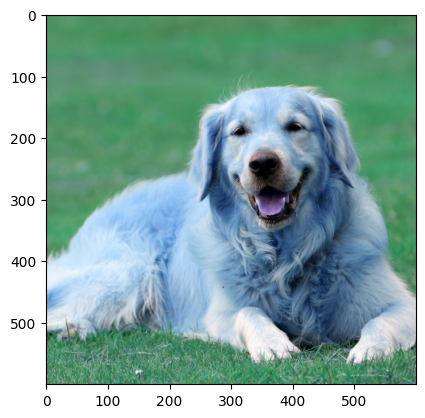

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
a=np.fromstring(upload[d],np.uint8)
img=cv2.imdecode(a,cv2.IMREAD_COLOR)
print(a)
plt.imshow(img,cmap=plt.get_cmap('gray'))